<a href="https://colab.research.google.com/github/PrabhuKiran8790/AI/blob/main/LoadForecasting_Autoencoder_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# downloading LoadForecasting Autoencoder module
!gdown 12FBZ_KUzmMEGYaUBgCusxuKUTE_oiWAC

Downloading...
From: https://drive.google.com/uc?id=12FBZ_KUzmMEGYaUBgCusxuKUTE_oiWAC
To: /content/LoadForecasting.py
100% 11.9k/11.9k [00:00<00:00, 14.2MB/s]


In [ ]:
# downloading Load Forecasting Dataset
!gdown 1nLu3t8zPpfjwm_7mAPUmqsAZzdoohXsj

Downloading...
From: https://drive.google.com/uc?id=1nLu3t8zPpfjwm_7mAPUmqsAZzdoohXsj
To: /content/Active_Power_Load_33_11KV-Godishala_Substation.xlsx
100% 603k/603k [00:00<00:00, 103MB/s]


# Importing Libraries

In [ ]:
import numpy as np
import math as mt
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from LoadForecasting import Autoencoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
data = pd.read_excel('Active_Power_Load_33_11KV-Godishala_Substation.xlsx')
data.head()

,DATE,TIME,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),Substation Shutdown,F1,F2,F3,F4,Jul-Oct-,Rainy,0
0,2021-01-01,01-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,Nov-Feb,Winter,1.0
1,NaT,02-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,Mar-Jun,Summer,2.0
2,NaT,03-00,11.6,102,0.96,1967.388015,0,1,65,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaT,04-00,11.3,130,0.96,2442.607331,0,1,78,49,NaN,NaN,NaN,NaN,NaN,Weekend,1,NaN
4,NaT,05-00,11.2,148,0.96,2756.205522,0,1,78,49,NaN,NaN,NaN,NaN,NaN,Weekday,0,NaN


In [ ]:
data.describe()

,VOLTAGE,CURRENT,PF,POWER (KW),"""WEEKEND/WEEKDAY""",SEASON,Temp (F),Humidity (%),Substation Shutdown,F1,F2,F3,F4,0
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000,8760.000000,66.0,25.0,71.0,97.0,46.0,2.000000
mean,11.550228,114.802854,0.929584,2129.985907,0.142466,0.99726,81.184132,67.726712,1.0,1.0,1.0,1.0,1.0,1.500000
std,0.179907,69.966107,0.058151,1302.278205,0.349547,0.81933,8.881827,20.684501,0.0,0.0,0.0,0.0,0.0,0.707107
min,11.000000,21.000000,0.690000,412.034103,0.000000,0.00000,50.000000,14.000000,1.0,1.0,1.0,1.0,1.0,1.000000
25%,11.400000,56.750000,0.900000,1062.656472,0.000000,0.00000,76.000000,52.000000,1.0,1.0,1.0,1.0,1.0,1.250000
50%,11.600000,92.000000,0.960000,1683.688485,0.000000,1.00000,81.000000,72.000000,1.0,1.0,1.0,1.0,1.0,1.500000
75%,11.700000,164.000000,0.970000,3025.768919,0.000000,2.00000,86.000000,87.000000,1.0,1.0,1.0,1.0,1.0,1.750000
max,12.000000,379.000000,1.000000,6306.206465,1.000000,2.00000,108.000000,102.000000,1.0,1.0,1.0,1.0,1.0,2.000000


In [ ]:
load = data.iloc[:, 5]
temp = data.iloc[:, 8]
hum = data.iloc[:, 9]
day_status = data.iloc[:, 6]
season_status = data.iloc[:, 7]

In [ ]:
k = 96
modified_data = np.zeros((len(load)-k, 13))
modified_data[:, 8] = day_status.iloc[k:]
modified_data[:, 9] = season_status.iloc[k:]
modified_data[:, 10] = temp.iloc[k:]
modified_data[:, 11] = hum.iloc[k:]
modified_data[:, 12] = load.iloc[k:]
for i in range(8664):
    modified_data[i, 0], modified_data[i, 1] = load.iloc[k-1], load.iloc[k-2]
    modified_data[i, 2], modified_data[i, 3] = load.iloc[k-3], load.iloc[k-4]
    modified_data[i, 4], modified_data[i, 5] = load.iloc[k-24], load.iloc[k-48]
    modified_data[i, 6], modified_data[i, 7] =load.iloc[k-72], load.iloc[k-96]
    k += 1
modified_data

array([[2083.6467292 ,  455.9762315 ,  515.45139213, ...,   66.        ,
          90.        , 2062.16583509],
       [2062.16583509, 2083.6467292 ,  455.9762315 , ...,   66.        ,
          90.        , 2062.16583509],
       [2062.16583509, 2062.16583509, 2083.6467292 , ...,   66.        ,
          90.        , 2062.16583509],
       ...,
       [1173.20461451, 1221.58079356, 1240.66799346, ...,   65.        ,
          94.        , 1078.59133914],
       [1078.59133914, 1173.20461451, 1221.58079356, ...,   65.        ,
          94.        ,  908.28744349],
       [ 908.28744349, 1078.59133914, 1173.20461451, ...,   65.        ,
          94.        ,  839.83679557]])

In [ ]:
df = pd.DataFrame(modified_data, columns = ['T-1','T-2','T-3','T-4','T-24','T-48','T-72', 'T-96', 'DAY','SEASON','TEMP','HUMIDITY','T'])
df

,T-1,T-2,T-3,T-4,T-24,T-48,T-72,T-96,DAY,SEASON,TEMP,HUMIDITY,T
0,2083.646729,455.976231,515.451392,654.226767,2260.056104,2236.756556,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
1,2062.165835,2083.646729,455.976231,515.451392,2260.056104,2236.756556,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
2,2062.165835,2062.165835,2083.646729,455.976231,2260.056104,2354.480586,1828.915749,1967.388015,0.0,1.0,66.0,90.0,2062.165835
3,2062.165835,2062.165835,2062.165835,2083.646729,2555.415800,2511.445958,1892.265507,2442.607331,0.0,1.0,80.0,40.0,2294.620910
4,2294.620910,2062.165835,2062.165835,2062.165835,2845.399210,2805.756031,2532.344883,2756.205522,0.0,1.0,80.0,40.0,2710.645657
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8659,1240.667993,1011.621595,847.076768,4727.043782,1160.855092,1154.281959,1116.436649,1097.513994,0.0,1.0,67.0,92.0,1221.580794
8660,1221.580794,1240.667993,1011.621595,847.076768,1011.067338,965.055409,1021.823374,965.055409,0.0,1.0,67.0,92.0,1173.204615
8661,1173.204615,1221.580794,1240.667993,1011.621595,898.726523,851.519478,946.132754,919.147402,0.0,1.0,65.0,94.0,1078.591339
8662,1078.591339,1173.204615,1221.580794,1240.667993,2023.111553,2668.094365,878.011195,825.356851,0.0,1.0,65.0,94.0,908.287443


In [ ]:
df.to_csv('modified_data_load_forecasting_godishala_SS.csv')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_scaled, test_size = 0.33, random_state = 100)
(df_train.shape, df_test.shape)

((5804, 13), (2860, 13))

In [ ]:
X_train, X_test = df_train[:, :12], df_test[:, :12]
y_train, y_test = df_train[:, 12], df_test[:, 12]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5804, 12), (2860, 12), (5804,), (2860,))

In [ ]:
cols = list(df.columns)
cols.remove('T')
X_train_df = pd.DataFrame(X_train, columns=cols)
X_test_df = pd.DataFrame(X_test, columns=cols)
cols.extend(['Total Variance', 'Average Variance'])

In [ ]:
variance_train = []
df_cols = list(df.columns)
df_cols.remove('T')

for col in df_cols:
    variance_train.append(X_train_df[col].var())
variance_train.append(sum(variance_train))
variance_train.append(sum(variance_train) / 12)

variance_test = []
for col in df_cols:
    variance_test.append(X_test_df[col].var())
variance_test.append(sum(variance_test))
variance_test.append(sum(variance_test) / 12)

variance_df = pd.DataFrame(list(zip(cols, variance_train, variance_test)), columns=['Column', 'Train Variance', 'Test Variance'])
variance_df

,Column,Train Variance,Test Variance
0,T-1,0.048504,0.049941
1,T-2,0.048482,0.049891
2,T-3,0.048509,0.049861
3,T-4,0.048350,0.050200
4,T-24,0.048373,0.050163
5,T-48,0.048178,0.049541
6,T-72,0.047702,0.050480
7,T-96,0.047513,0.049859
8,DAY,0.120475,0.123098
9,SEASON,0.170806,0.167332


In [ ]:
enc11 = Autoencoder(11, X_train, X_test)
enc11.build_model()

Model: "autoencoder_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 12)]              0         
                                                                 
 latent_space (Dense)        (None, 11)                143       
                                                                 
 Output (Dense)              (None, 12)                144       
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________


In [ ]:
enc11.compile_fit_make_df()

Batch Size: 32
Epochs: 100


Please wait while the training process completes..




Loss: 0.007805532775819302
Validation Loss: 0.007533008232712746




,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11
0,0.504905,2.426993,0.446576,0.278239,0.000000,3.178578,0.416052,1.654557,0.325926,0.260812,0.308129
1,1.020232,0.921296,0.494843,0.788304,1.027978,0.370910,1.193024,1.024796,0.201167,0.105372,0.437653
2,0.961868,1.805844,0.000000,0.000000,0.267896,0.314707,0.497623,0.172210,1.296082,0.457783,1.645504
3,0.454420,0.553333,0.438018,1.019935,1.077004,1.607815,0.758381,1.969618,0.720343,0.187228,0.878838
4,1.012245,1.267853,0.676465,0.721923,0.814354,0.836141,1.261311,1.016486,0.259214,0.272140,0.331245
...,...,...,...,...,...,...,...,...,...,...,...
5799,0.431354,2.149977,0.520243,0.290902,0.000000,2.945919,0.364273,1.618169,0.350209,0.295086,0.333898
5800,0.201652,1.999797,1.102401,0.108634,0.000000,2.760482,0.911029,0.671965,0.311604,0.859398,0.000000
5801,0.768368,0.957094,0.000000,0.182998,0.912214,0.003876,1.149895,0.024923,1.441441,0.708818,1.554705
5802,1.382524,1.588038,0.468544,0.555487,0.589782,0.154079,0.936090,0.667810,0.039224,0.053523,0.284826


In [ ]:
enc11.metrics()

(0.007805532775819302, 0.007533008232712746)

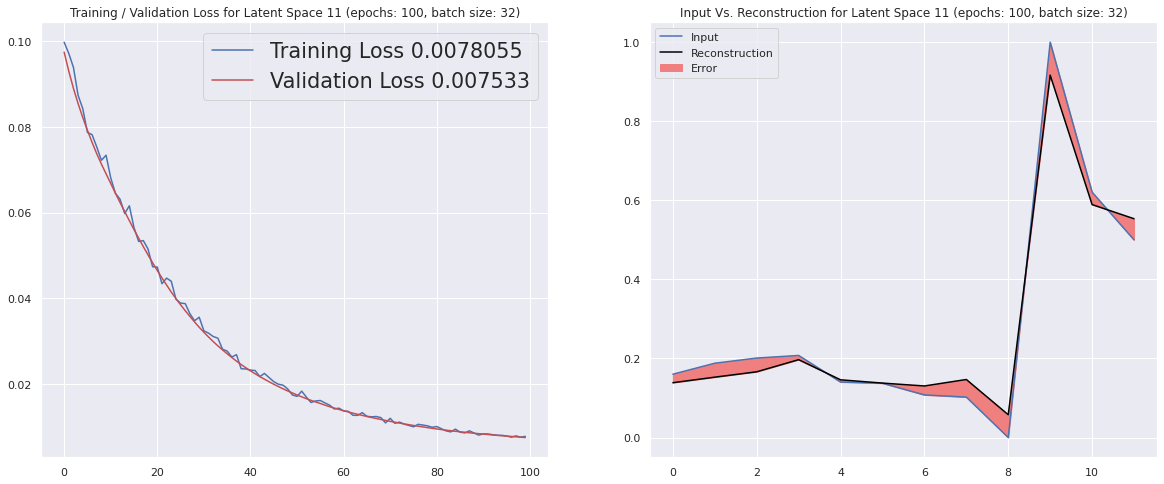

In [ ]:
enc11.diplay_plots()

Model: "autoencoder_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 12)]              0         
                                                                 
 latent_space (Dense)        (None, 11)                143       
                                                                 
 Output (Dense)              (None, 12)                144       
                                                                 
Total params: 287
Trainable params: 287
Non-trainable params: 0
_________________________________________________________________
Batch Size: 8
Epochs: 100


Please wait while the training process completes..




Loss: 0.010259670205414295
Validation Loss: 0.010289466008543968


Model: "autoencoder_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_inp

{'ls10_16b': {'training_loss': 0.012622696347534657,
  'valLoss': 0.012553932145237923},
 'ls10_32b': {'training_loss': 0.005827053915709257,
  'valLoss': 0.00577401090413332},
 'ls10_64b': {'training_loss': 0.0075827063992619514,
  'valLoss': 0.007215974386781454},
 'ls10_8b': {'training_loss': 0.008245406672358513,
  'valLoss': 0.007731084246188402},
 'ls11_16b': {'training_loss': 0.011142224073410034,
  'valLoss': 0.010855433531105518},
 'ls11_32b': {'training_loss': 0.02031349577009678,
  'valLoss': 0.021020200103521347},
 'ls11_64b': {'training_loss': 0.011009224690496922,
  'valLoss': 0.010849110782146454},
 'ls11_8b': {'training_loss': 0.010259670205414295,
  'valLoss': 0.010289466008543968},
 'ls7_16b': {'training_loss': 0.021956011652946472,
  'valLoss': 0.02246229350566864},
 'ls7_32b': {'training_loss': 0.02075021155178547,
  'valLoss': 0.021588267758488655},
 'ls7_64b': {'training_loss': 0.01848515495657921,
  'valLoss': 0.01865251176059246},
 'ls7_8b': {'training_loss': 0.

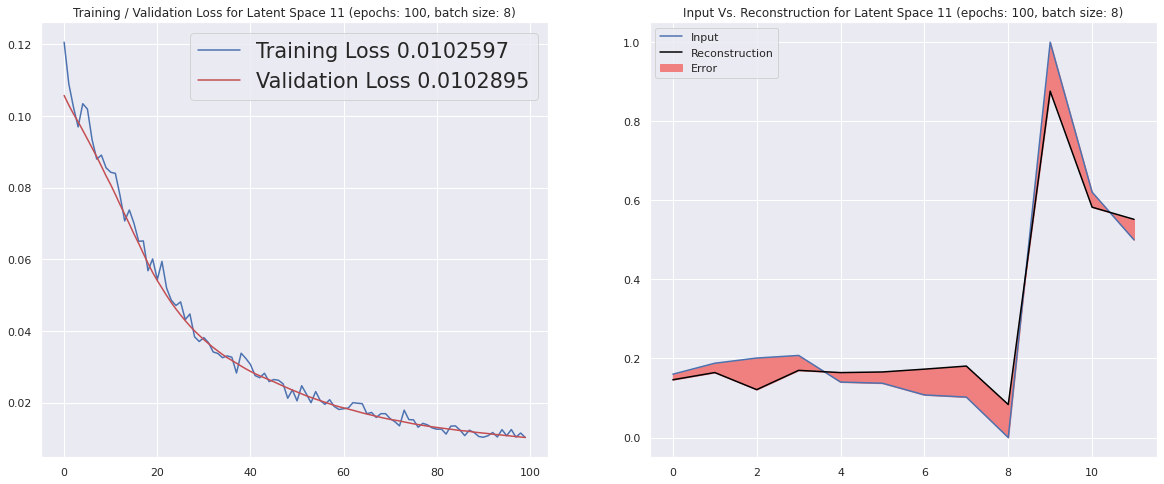

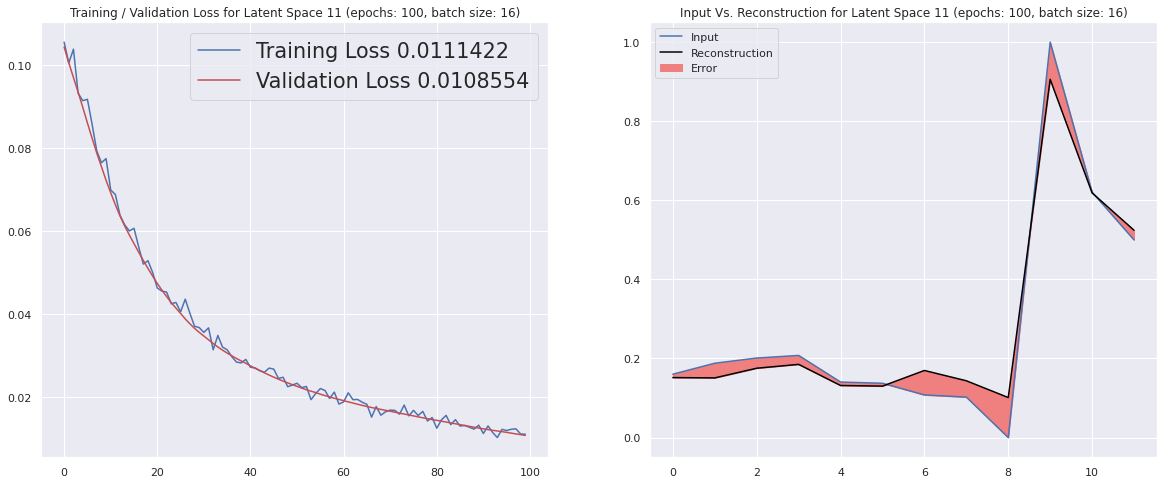

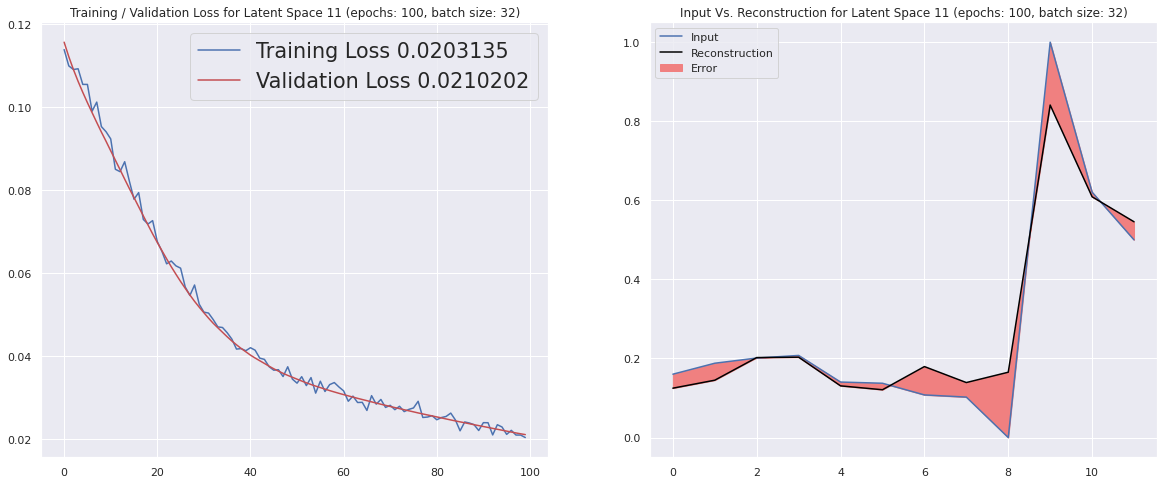

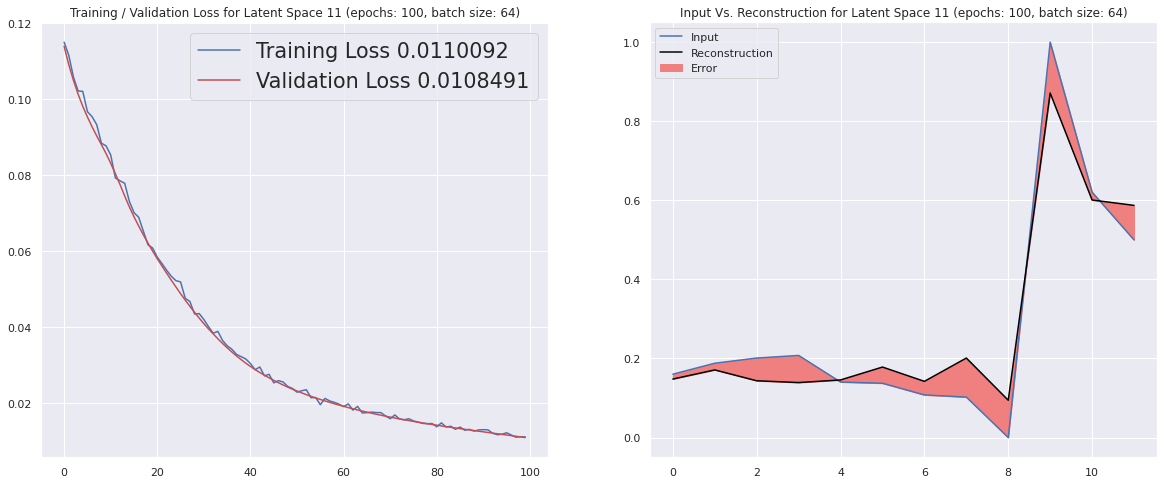

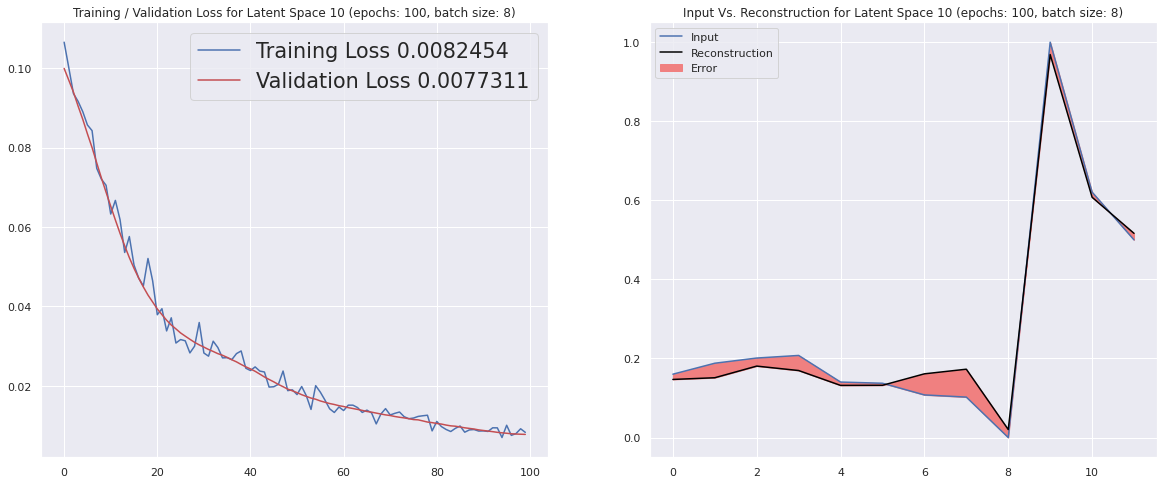

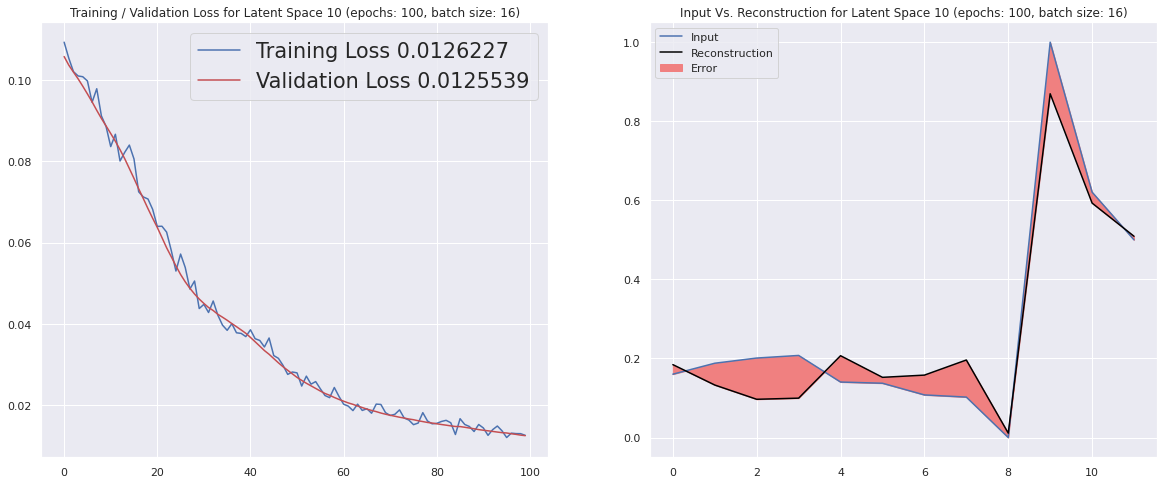

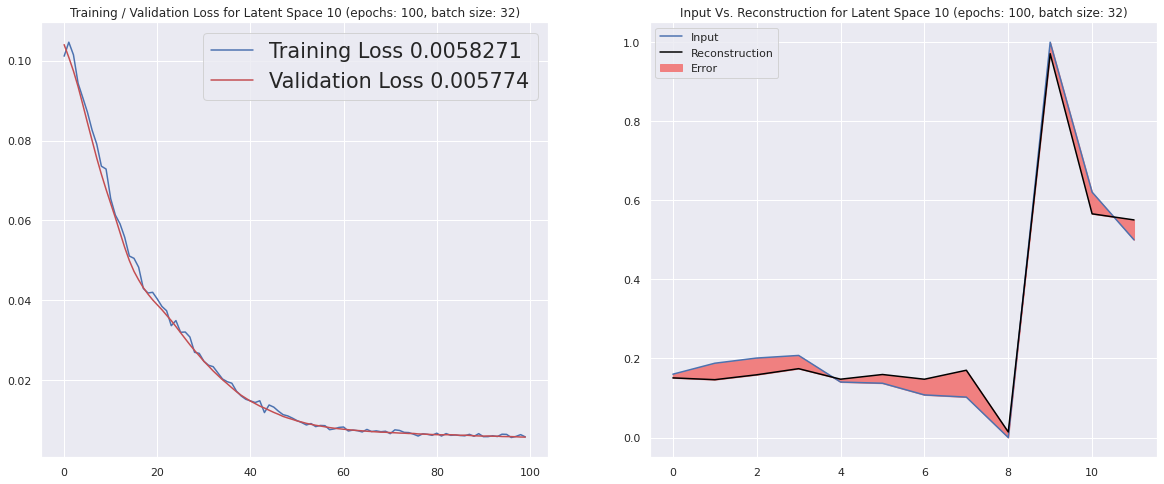

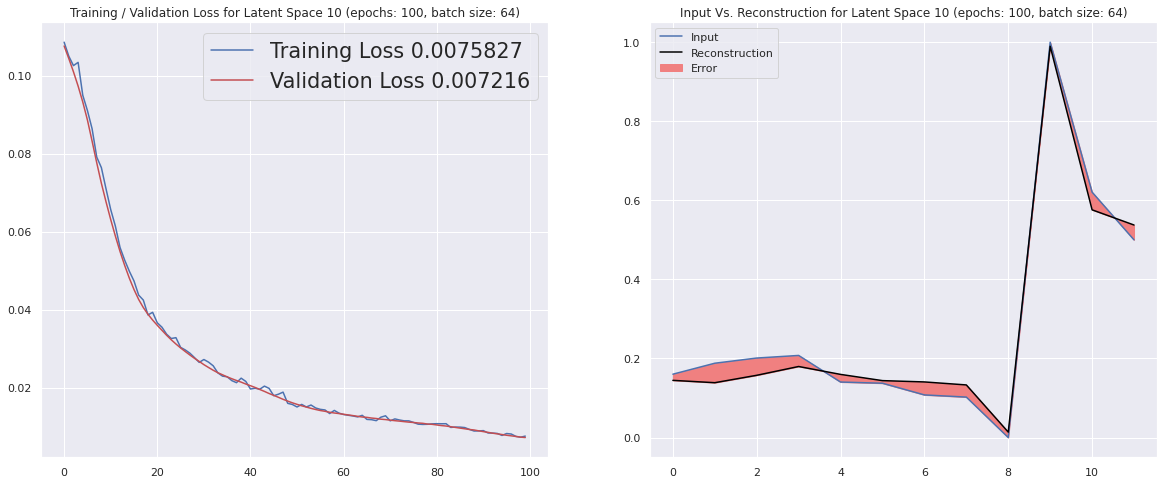

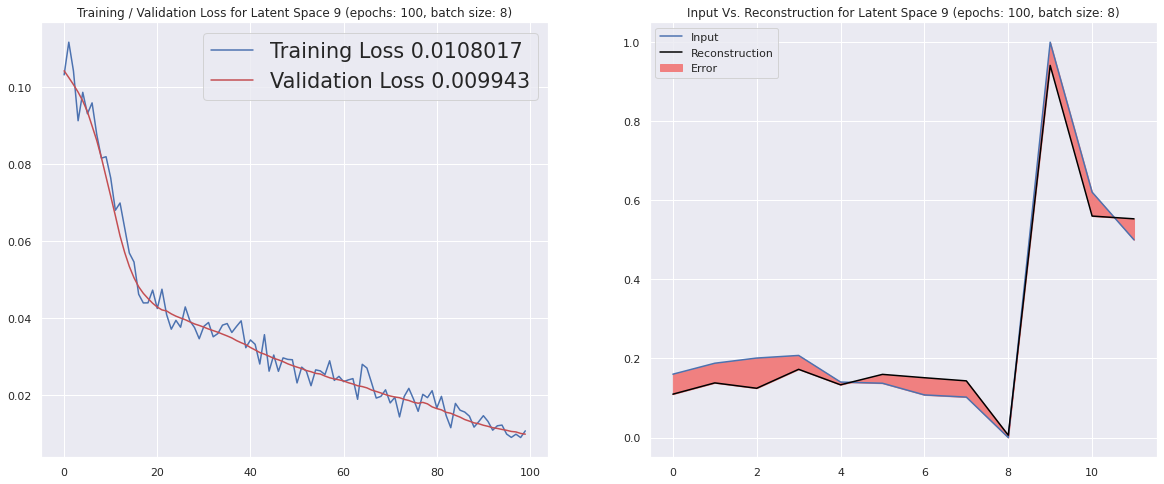

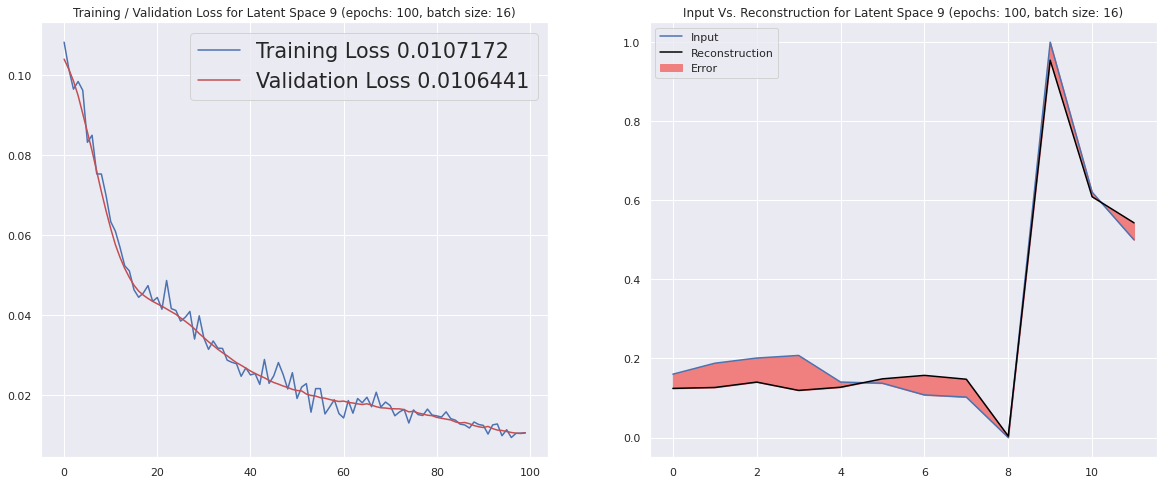

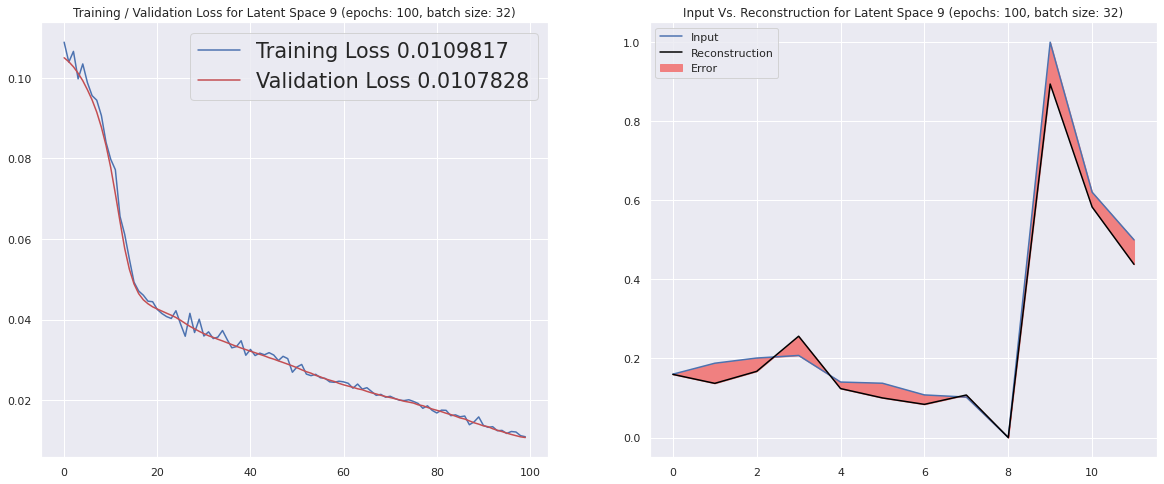

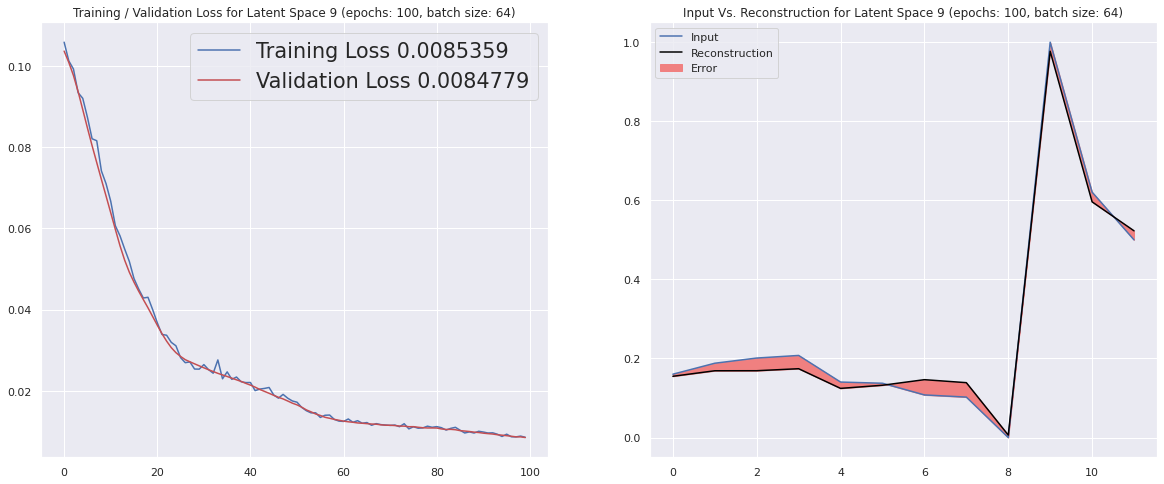

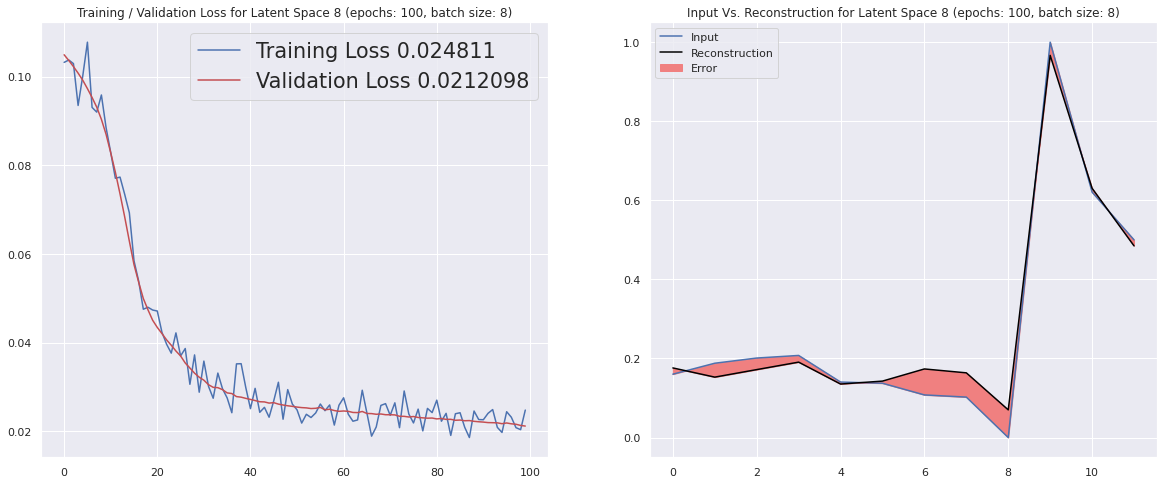

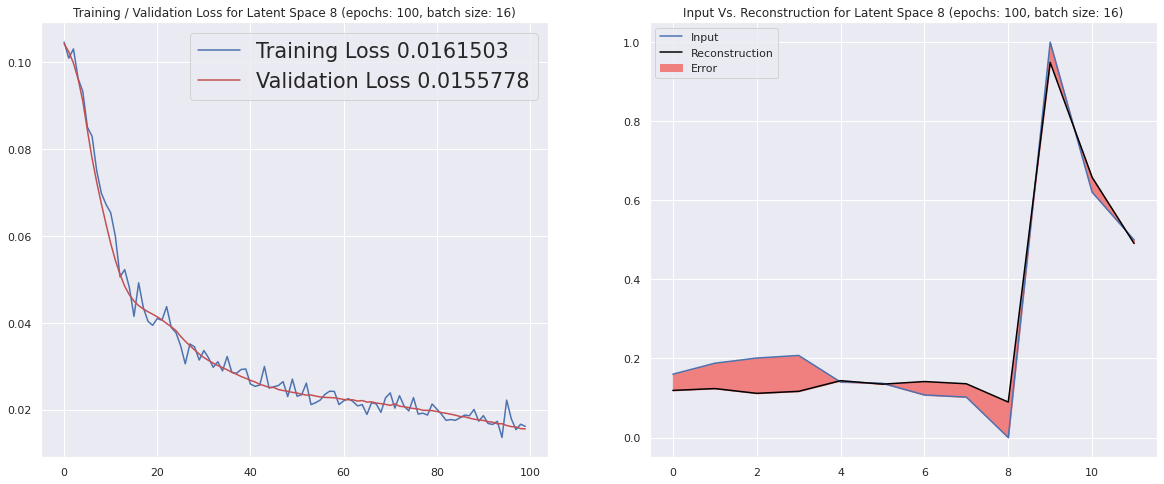

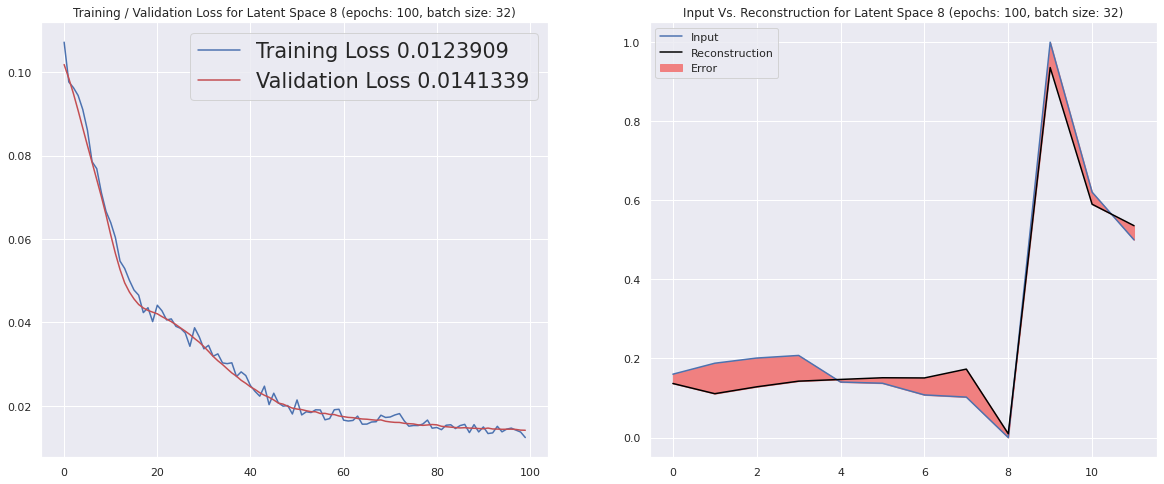

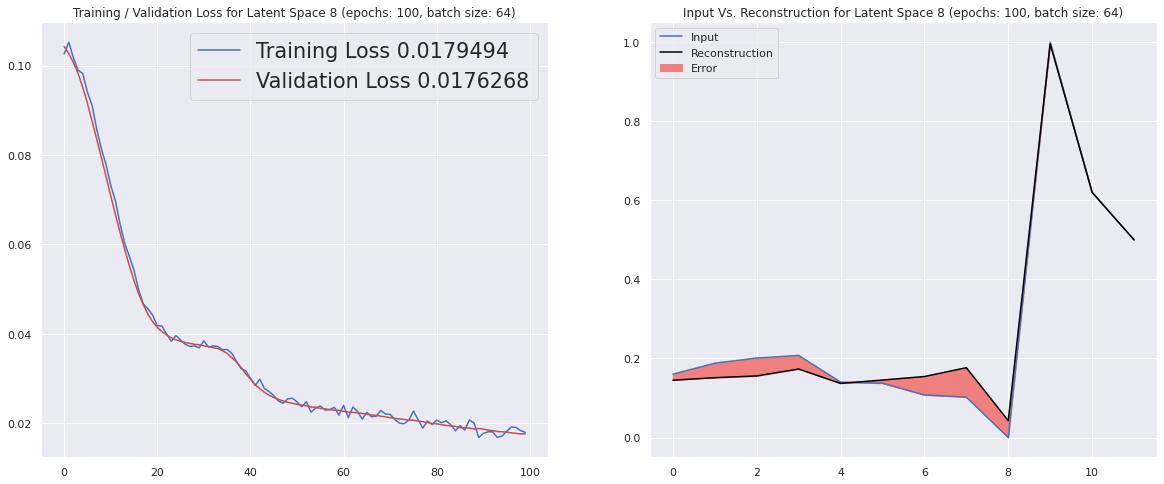

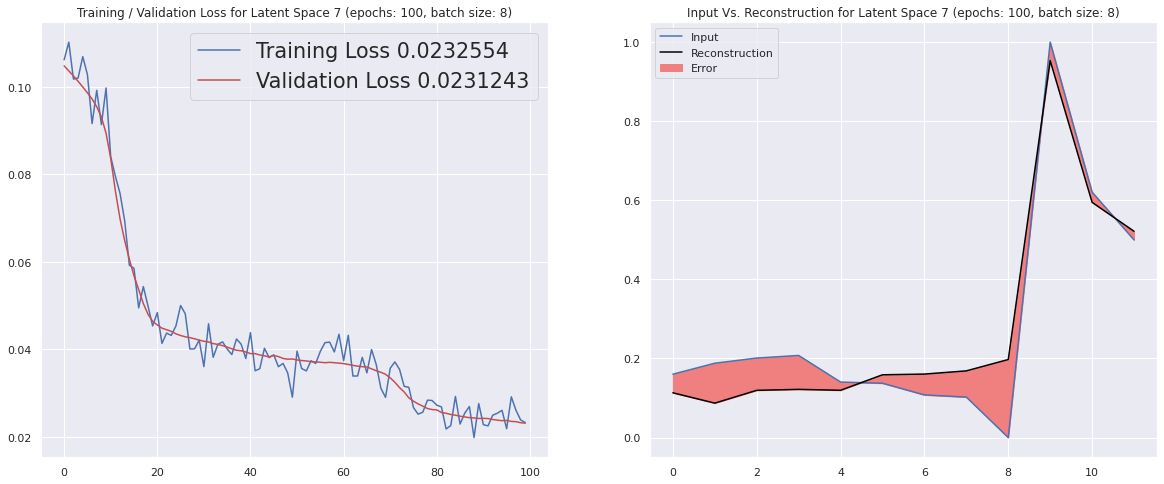

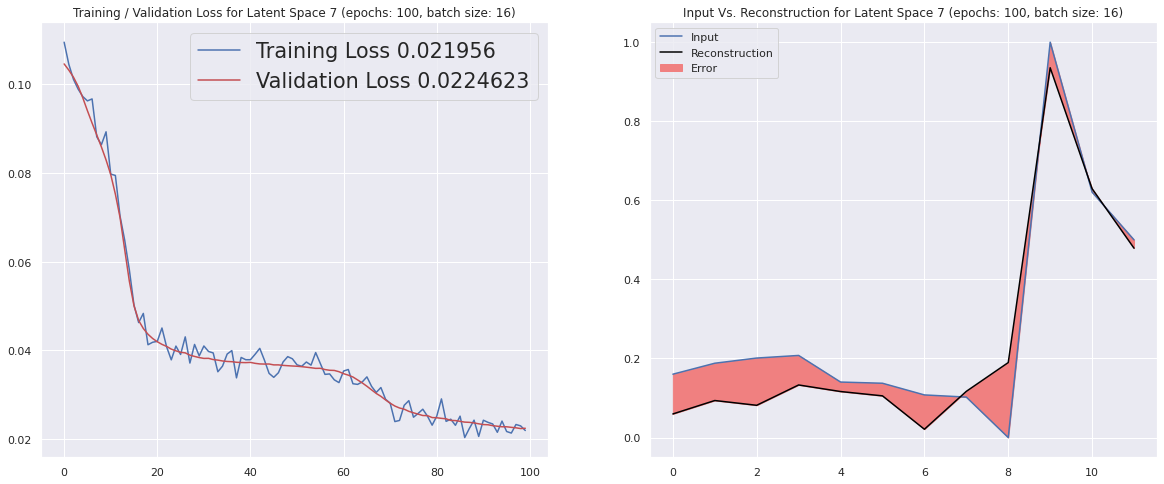

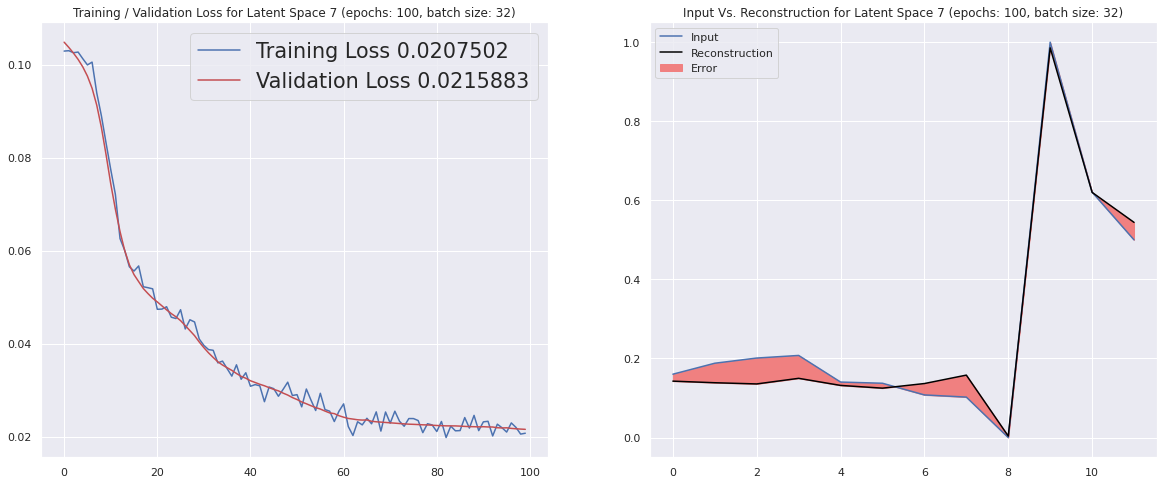

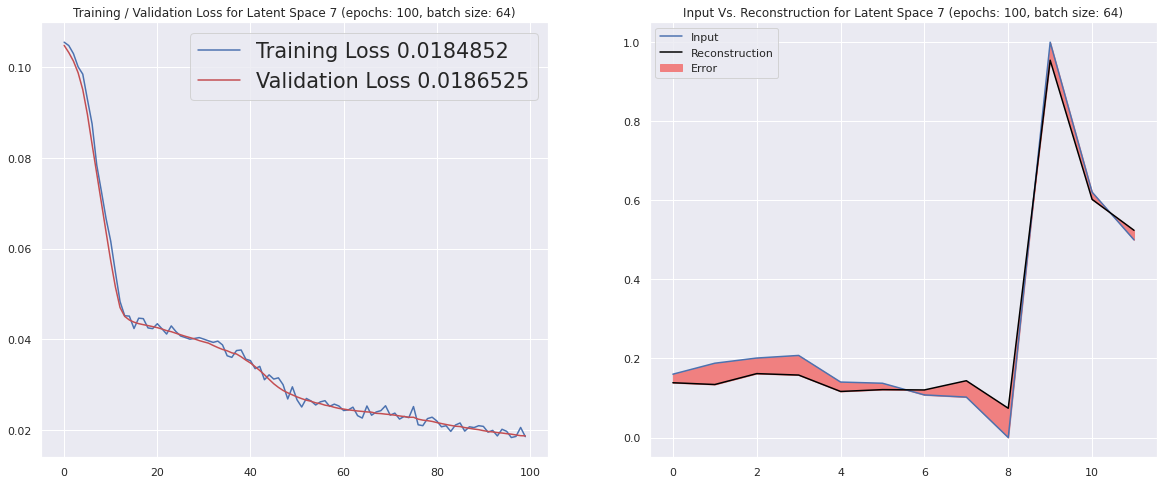

In [ ]:
# building a model for batch sizes = [8, 16, 32, 64] till latent space = 7
batchsizes = [8, 16, 32, 64]
latentspaces = [i for i in range(11, 6, -1)]

models = {}

for i in range(len(latentspaces)):
    for batch in batchsizes:
        models[f'ls{latentspaces[i]}_{batch}b'] = {'training_loss': 0, 'valLoss': 0}
        model_ = Autoencoder(latentspaces[i], X_train, X_test)
        model_.build_model()
        model_.compile_fit_make_df(batch_size=batch)
        loss, val_loss = model_.metrics()
        model_.diplay_plots()
        models[f'ls{latentspaces[i]}_{batch}b']['training_loss'] = loss
        models[f'ls{latentspaces[i]}_{batch}b']['valLoss'] = val_loss
models

In [ ]:
import json
json_object = json.dumps(models, indent = 4) 
print(json_object)

{
    "ls11_8b": {
        "training_loss": 0.010259670205414295,
        "valLoss": 0.010289466008543968
    },
    "ls11_16b": {
        "training_loss": 0.011142224073410034,
        "valLoss": 0.010855433531105518
    },
    "ls11_32b": {
        "training_loss": 0.02031349577009678,
        "valLoss": 0.021020200103521347
    },
    "ls11_64b": {
        "training_loss": 0.011009224690496922,
        "valLoss": 0.010849110782146454
    },
    "ls10_8b": {
        "training_loss": 0.008245406672358513,
        "valLoss": 0.007731084246188402
    },
    "ls10_16b": {
        "training_loss": 0.012622696347534657,
        "valLoss": 0.012553932145237923
    },
    "ls10_32b": {
        "training_loss": 0.005827053915709257,
        "valLoss": 0.00577401090413332
    },
    "ls10_64b": {
        "training_loss": 0.0075827063992619514,
        "valLoss": 0.007215974386781454
    },
    "ls9_8b": {
        "training_loss": 0.010801700875163078,
        "valLoss": 0.009942984208464622
  

In [ ]:
models_ls11_ls7 = models

Model: "autoencoder_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 12)]              0         
                                                                 
 encoder_layer1 (Dense)      (None, 11)                143       
                                                                 
 encoder_layer2 (Dense)      (None, 10)                120       
                                                                 
 encoder_layer3 (Dense)      (None, 9)                 99        
                                                                 
 encoder_layer4 (Dense)      (None, 8)                 80        
                                                                 
 encoder_layer5 (Dense)      (None, 7)                 63        
                                                                 
 latent_space (Dense)        (None, 6)               

{'ls4_16b': {'training_loss': 0.030700277537107468,
  'valLoss': 0.034041877835989},
 'ls4_32b': {'training_loss': 0.03190005570650101,
  'valLoss': 0.03326720371842384},
 'ls4_64b': {'training_loss': 0.02686038240790367,
  'valLoss': 0.02730320580303669},
 'ls4_8b': {'training_loss': 0.03906361013650894,
  'valLoss': 0.03699120879173279},
 'ls5_16b': {'training_loss': 0.03742656111717224,
  'valLoss': 0.036539580672979355},
 'ls5_32b': {'training_loss': 0.0347912535071373,
  'valLoss': 0.03453030437231064},
 'ls5_64b': {'training_loss': 0.02982228994369507,
  'valLoss': 0.03046177700161934},
 'ls5_8b': {'training_loss': 0.0373210571706295,
  'valLoss': 0.03798326849937439},
 'ls6_16b': {'training_loss': 0.023009171709418297,
  'valLoss': 0.02361341007053852},
 'ls6_32b': {'training_loss': 0.02297188714146614,
  'valLoss': 0.02285771630704403},
 'ls6_64b': {'training_loss': 0.03363076597452164,
  'valLoss': 0.033145058900117874},
 'ls6_8b': {'training_loss': 0.020962566137313843,
  'va

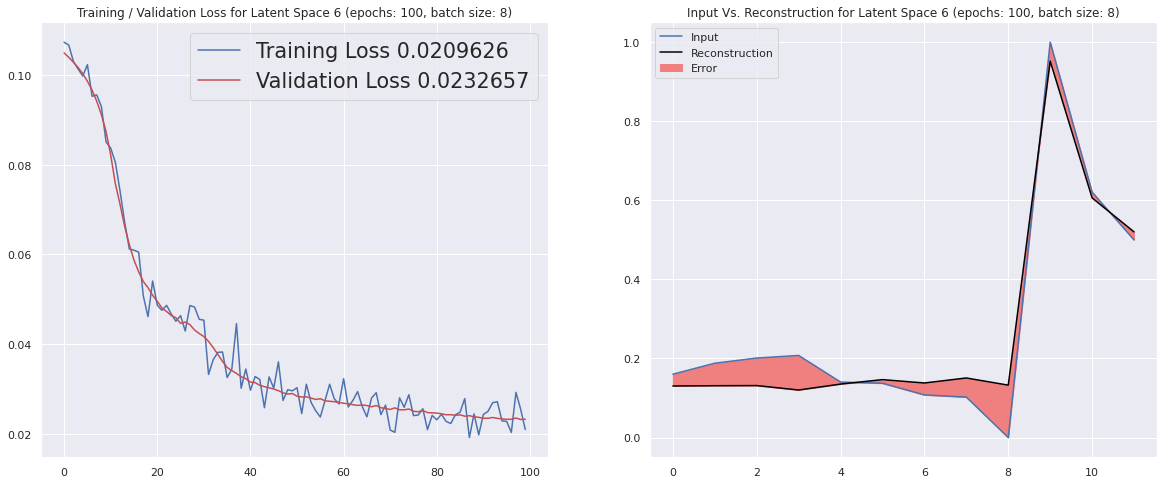

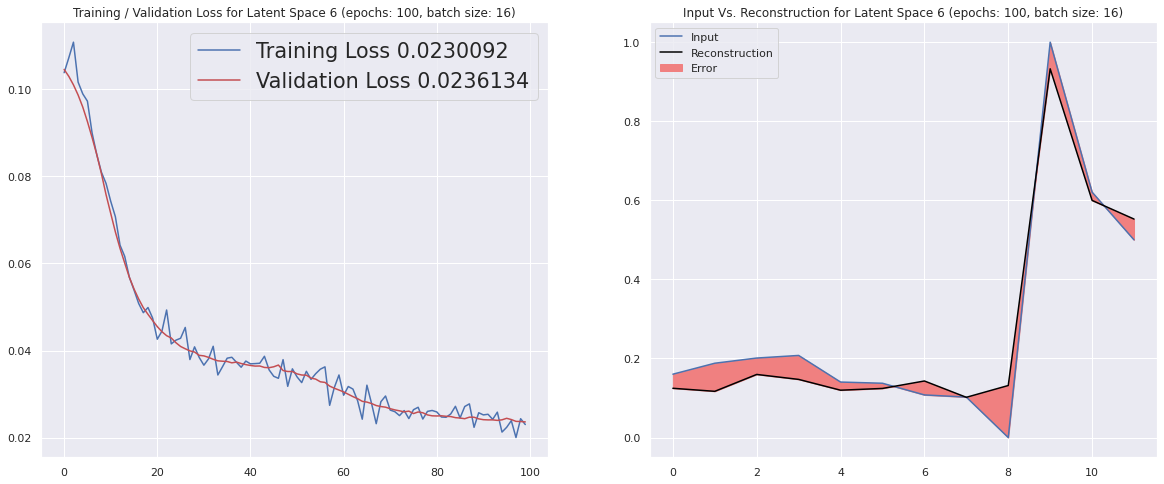

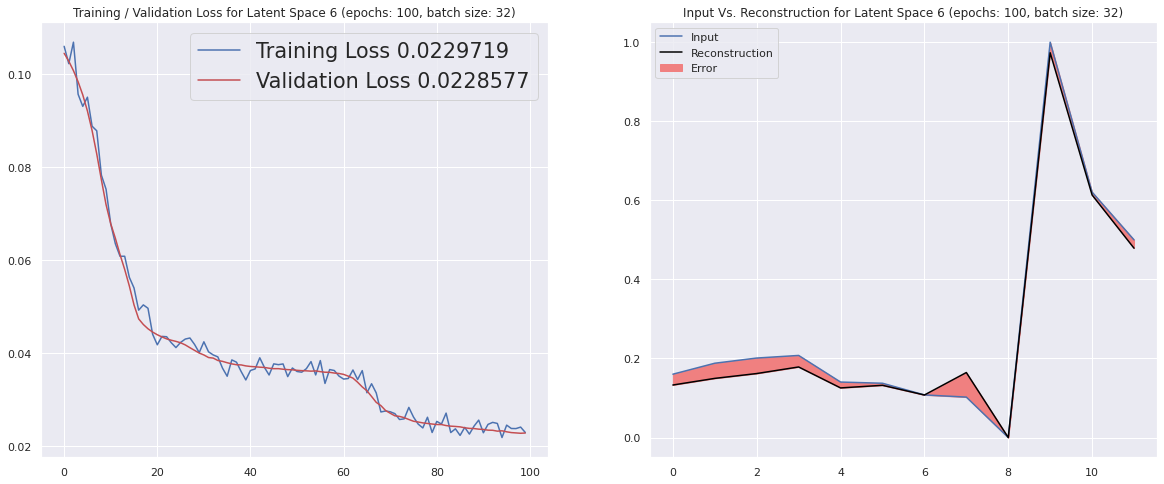

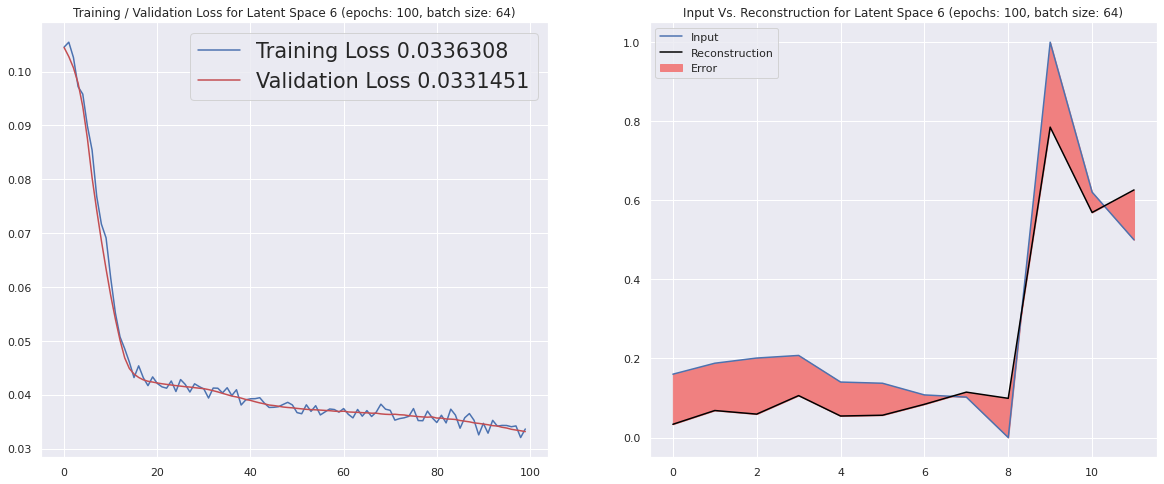

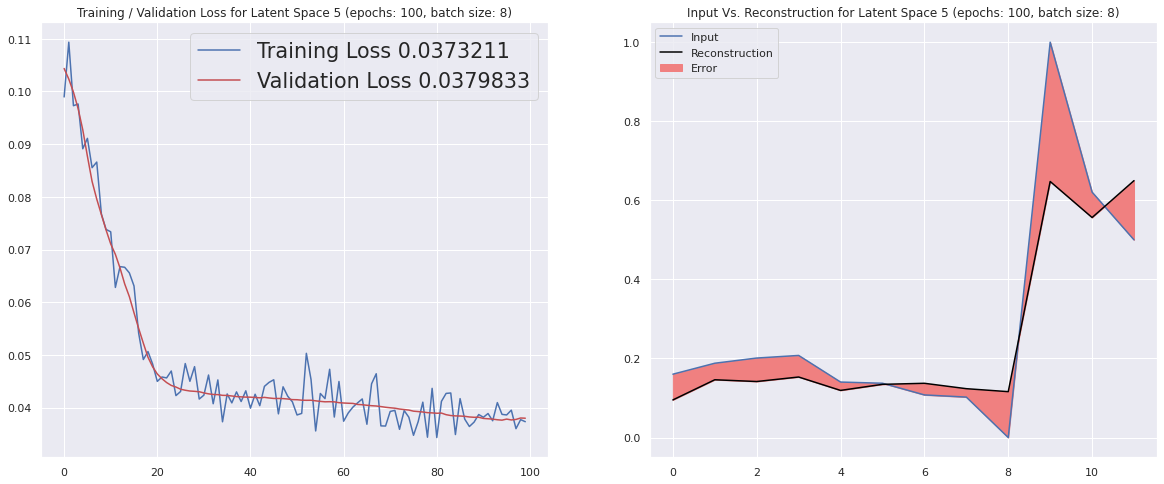

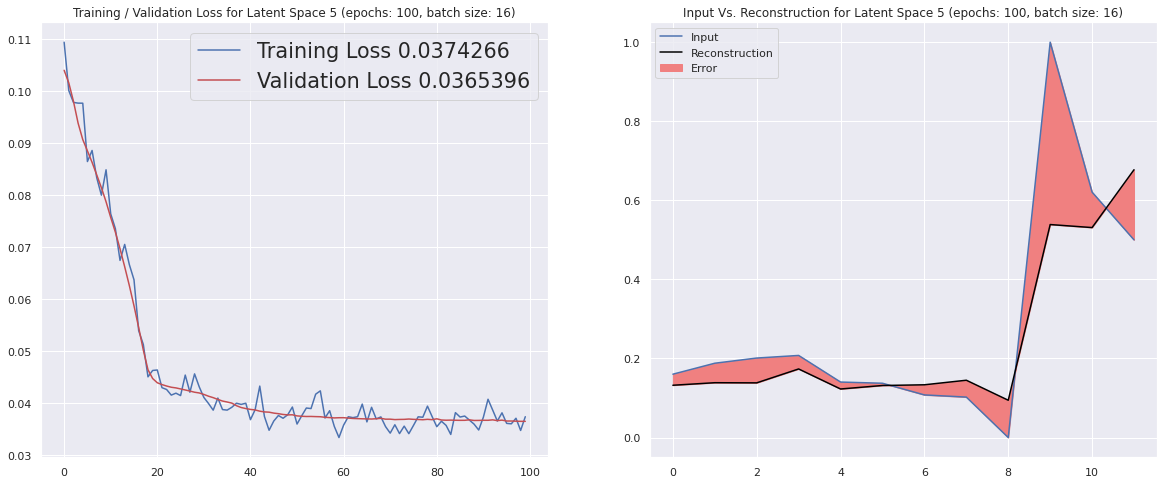

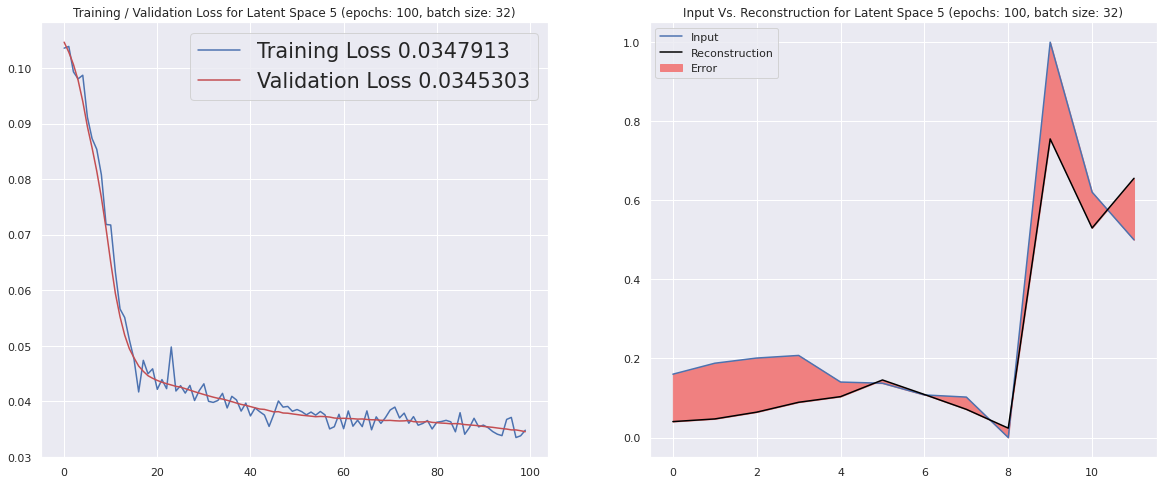

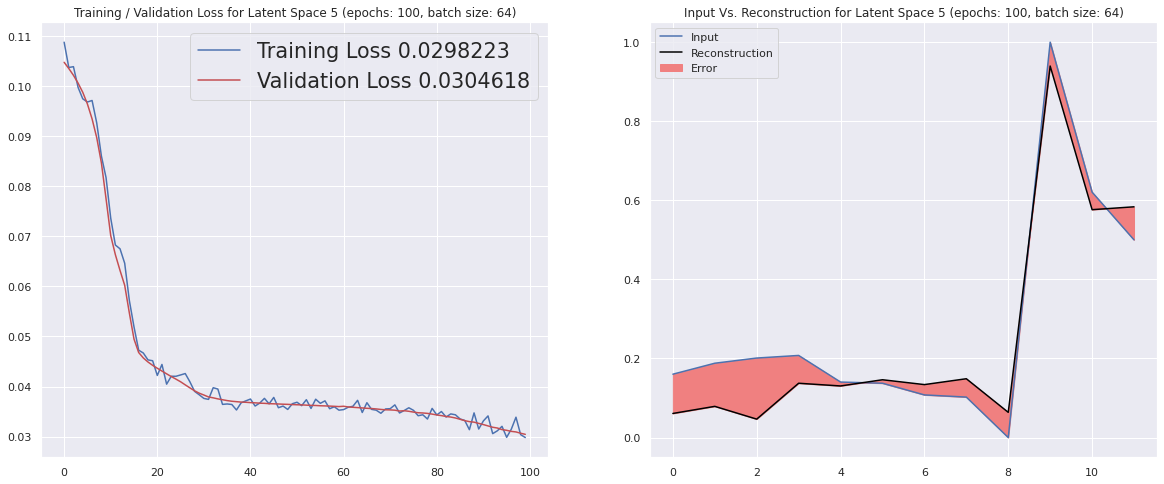

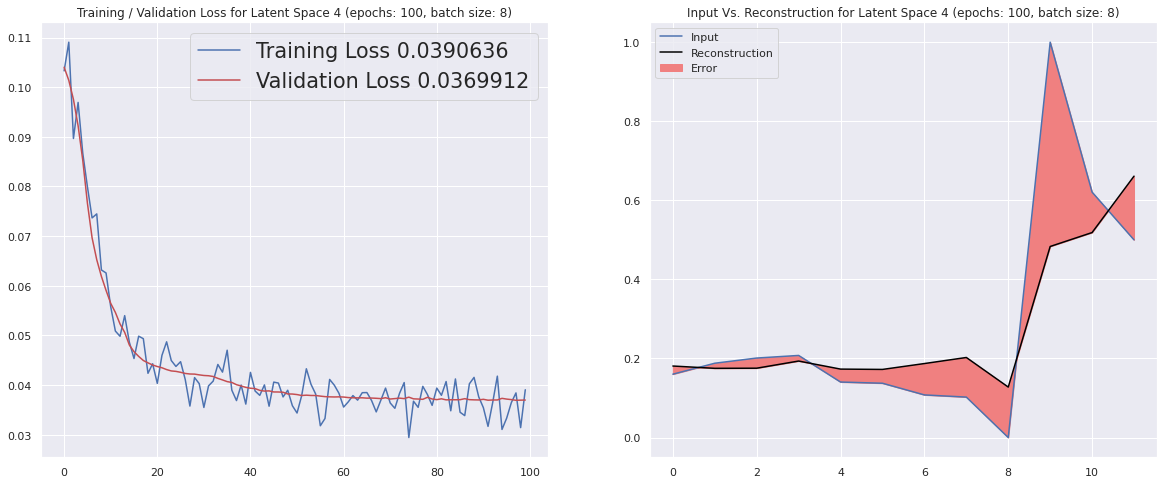

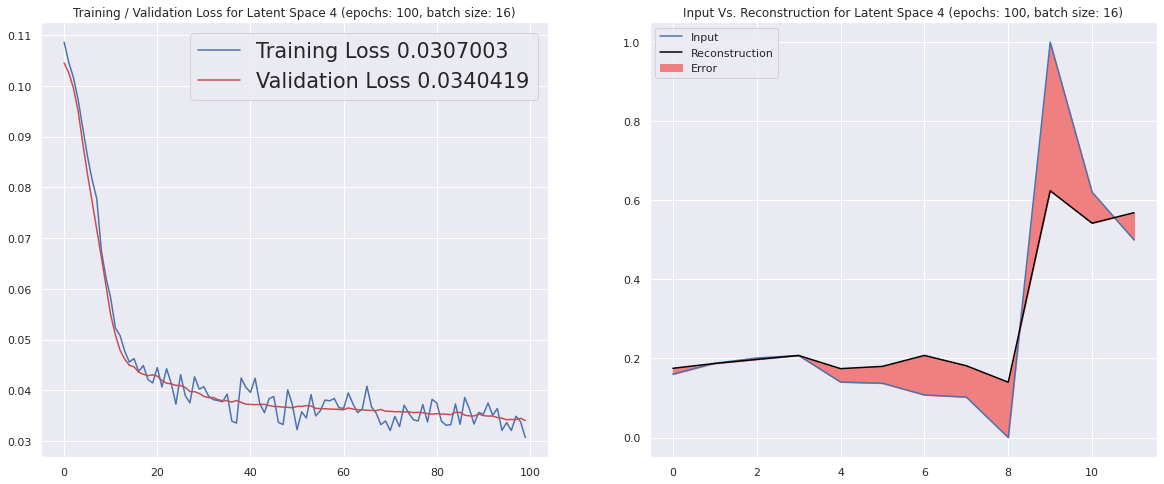

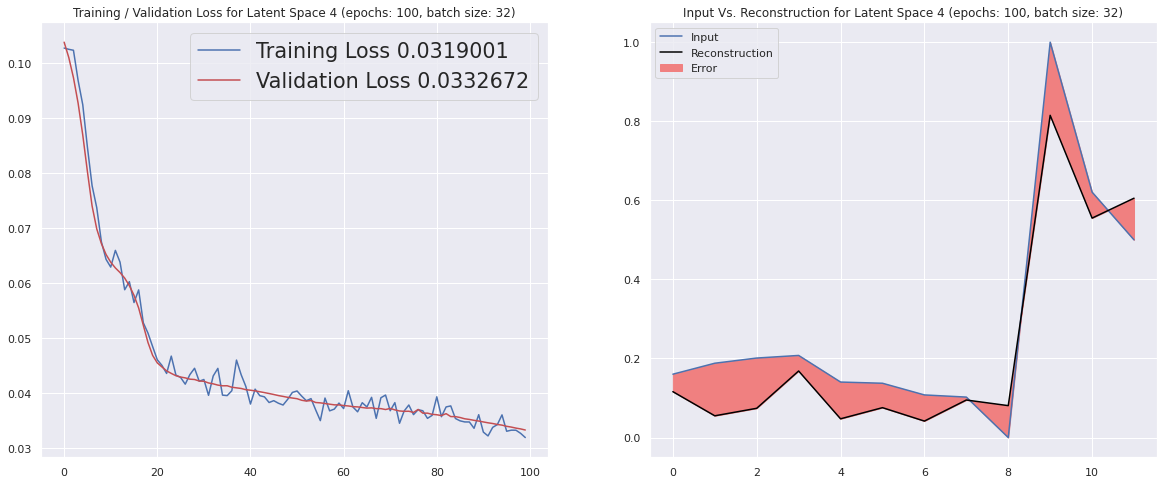

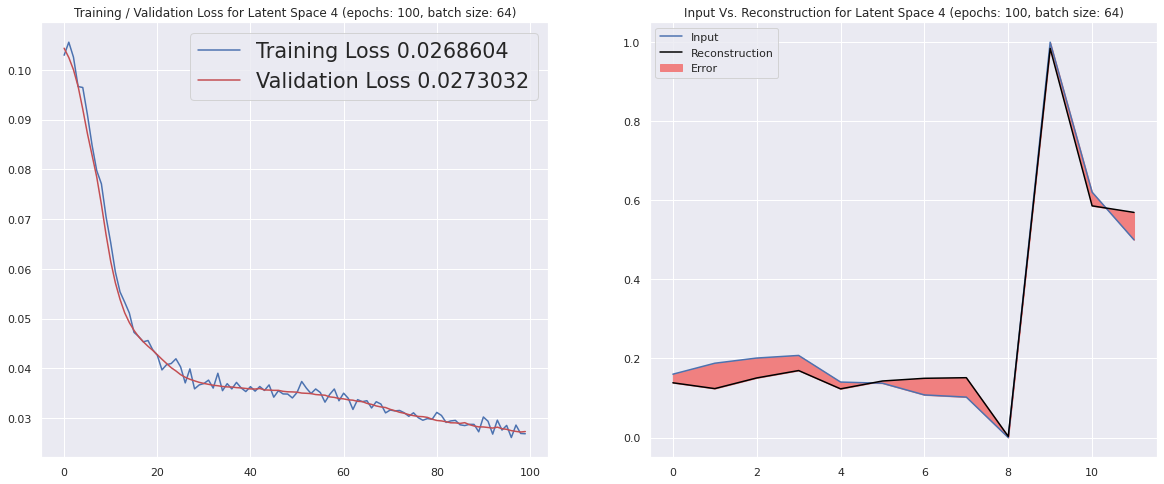

In [ ]:
# building a model for batch sizes = [8, 16, 32, 64] till latent space = 7
batchsizes = [8, 16, 32, 64]
latentspaces = [i for i in range(6, 3, -1)]

models = {}

for i in range(len(latentspaces)):
    for batch in batchsizes:
        models[f'ls{latentspaces[i]}_{batch}b'] = {'training_loss': 0, 'valLoss': 0}
        model_ = Autoencoder(latentspaces[i], X_train, X_test)
        model_.build_model()
        model_.compile_fit_make_df(batch_size=batch)
        loss, val_loss = model_.metrics()
        model_.diplay_plots()
        models[f'ls{latentspaces[i]}_{batch}b']['training_loss'] = loss
        models[f'ls{latentspaces[i]}_{batch}b']['valLoss'] = val_loss
models

In [ ]:
models

{'ls4_16b': {'training_loss': 0.030700277537107468,
  'valLoss': 0.034041877835989},
 'ls4_32b': {'training_loss': 0.03190005570650101,
  'valLoss': 0.03326720371842384},
 'ls4_64b': {'training_loss': 0.02686038240790367,
  'valLoss': 0.02730320580303669},
 'ls4_8b': {'training_loss': 0.03906361013650894,
  'valLoss': 0.03699120879173279},
 'ls5_16b': {'training_loss': 0.03742656111717224,
  'valLoss': 0.036539580672979355},
 'ls5_32b': {'training_loss': 0.0347912535071373,
  'valLoss': 0.03453030437231064},
 'ls5_64b': {'training_loss': 0.02982228994369507,
  'valLoss': 0.03046177700161934},
 'ls5_8b': {'training_loss': 0.0373210571706295,
  'valLoss': 0.03798326849937439},
 'ls6_16b': {'training_loss': 0.023009171709418297,
  'valLoss': 0.02361341007053852},
 'ls6_32b': {'training_loss': 0.02297188714146614,
  'valLoss': 0.02285771630704403},
 'ls6_64b': {'training_loss': 0.03363076597452164,
  'valLoss': 0.033145058900117874},
 'ls6_8b': {'training_loss': 0.020962566137313843,
  'va

In [ ]:
json_object = json.dumps(models, indent = 4) 
print(json_object)

{
    "ls6_8b": {
        "training_loss": 0.020962566137313843,
        "valLoss": 0.023265736177563667
    },
    "ls6_16b": {
        "training_loss": 0.023009171709418297,
        "valLoss": 0.02361341007053852
    },
    "ls6_32b": {
        "training_loss": 0.02297188714146614,
        "valLoss": 0.02285771630704403
    },
    "ls6_64b": {
        "training_loss": 0.03363076597452164,
        "valLoss": 0.033145058900117874
    },
    "ls5_8b": {
        "training_loss": 0.0373210571706295,
        "valLoss": 0.03798326849937439
    },
    "ls5_16b": {
        "training_loss": 0.03742656111717224,
        "valLoss": 0.036539580672979355
    },
    "ls5_32b": {
        "training_loss": 0.0347912535071373,
        "valLoss": 0.03453030437231064
    },
    "ls5_64b": {
        "training_loss": 0.02982228994369507,
        "valLoss": 0.03046177700161934
    },
    "ls4_8b": {
        "training_loss": 0.03906361013650894,
        "valLoss": 0.03699120879173279
    },
    "ls4_16b": {


In [ ]:
models = {
    "ls11_8b": {
        "training_loss": 0.010259670205414295,
        "valLoss": 0.010289466008543968
    },
    "ls11_16b": {
        "training_loss": 0.011142224073410034,
        "valLoss": 0.010855433531105518
    },
    "ls11_32b": {
        "training_loss": 0.02031349577009678,
        "valLoss": 0.021020200103521347
    },
    "ls11_64b": {
        "training_loss": 0.011009224690496922,
        "valLoss": 0.010849110782146454
    },
    "ls10_8b": {
        "training_loss": 0.008245406672358513,
        "valLoss": 0.007731084246188402
    },
    "ls10_16b": {
        "training_loss": 0.012622696347534657,
        "valLoss": 0.012553932145237923
    },
    "ls10_32b": {
        "training_loss": 0.005827053915709257,
        "valLoss": 0.00577401090413332
    },
    "ls10_64b": {
        "training_loss": 0.0075827063992619514,
        "valLoss": 0.007215974386781454
    },
    "ls9_8b": {
        "training_loss": 0.010801700875163078,
        "valLoss": 0.009942984208464622
    },
    "ls9_16b": {
        "training_loss": 0.010717219673097134,
        "valLoss": 0.010644129477441311
    },
    "ls9_32b": {
        "training_loss": 0.010981696657836437,
        "valLoss": 0.010782768949866295
    },
    "ls9_64b": {
        "training_loss": 0.00853594671934843,
        "valLoss": 0.008477922528982162
    },
    "ls8_8b": {
        "training_loss": 0.024811021983623505,
        "valLoss": 0.02120976522564888
    },
    "ls8_16b": {
        "training_loss": 0.01615026220679283,
        "valLoss": 0.015577836893498898
    },
    "ls8_32b": {
        "training_loss": 0.012390890158712864,
        "valLoss": 0.014133928343653679
    },
    "ls8_64b": {
        "training_loss": 0.017949353903532028,
        "valLoss": 0.017626790329813957
    },
    "ls7_8b": {
        "training_loss": 0.02325538732111454,
        "valLoss": 0.023124292492866516
    },
    "ls7_16b": {
        "training_loss": 0.021956011652946472,
        "valLoss": 0.02246229350566864
    },
    "ls7_32b": {
        "training_loss": 0.02075021155178547,
        "valLoss": 0.021588267758488655
    },
    "ls7_64b": {
        "training_loss": 0.01848515495657921,
        "valLoss": 0.01865251176059246
    },
    "ls6_8b": {
        "training_loss": 0.020962566137313843,
        "valLoss": 0.023265736177563667
    },
    "ls6_16b": {
        "training_loss": 0.023009171709418297,
        "valLoss": 0.02361341007053852
    },
    "ls6_32b": {
        "training_loss": 0.02297188714146614,
        "valLoss": 0.02285771630704403
    },
    "ls6_64b": {
        "training_loss": 0.03363076597452164,
        "valLoss": 0.033145058900117874
    },
    "ls5_8b": {
        "training_loss": 0.0373210571706295,
        "valLoss": 0.03798326849937439
    },
    "ls5_16b": {
        "training_loss": 0.03742656111717224,
        "valLoss": 0.036539580672979355
    },
    "ls5_32b": {
        "training_loss": 0.0347912535071373,
        "valLoss": 0.03453030437231064
    },
    "ls5_64b": {
        "training_loss": 0.02982228994369507,
        "valLoss": 0.03046177700161934
    },
    "ls4_8b": {
        "training_loss": 0.03906361013650894,
        "valLoss": 0.03699120879173279
    },
    "ls4_16b": {
        "training_loss": 0.030700277537107468,
        "valLoss": 0.034041877835989
    },
    "ls4_32b": {
        "training_loss": 0.03190005570650101,
        "valLoss": 0.03326720371842384
    },
    "ls4_64b": {
        "training_loss": 0.02686038240790367,
        "valLoss": 0.02730320580303669
    }
}

In [ ]:
traibatchisizedf = pd.DataFrame.from_dict(models, orient='index')
traibatchisizedf.reset_index(level=0, inplace=True)
traibatchisizedf

,index,training_loss,valLoss
0,ls11_8b,0.010260,0.010289
1,ls11_16b,0.011142,0.010855
2,ls11_32b,0.020313,0.021020
3,ls11_64b,0.011009,0.010849
4,ls10_8b,0.008245,0.007731
5,ls10_16b,0.012623,0.012554
6,ls10_32b,0.005827,0.005774
7,ls10_64b,0.007583,0.007216
8,ls9_8b,0.010802,0.009943
9,ls9_16b,0.010717,0.010644
